Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'

2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

3. Buatlah model K-Means dengan mempertimbangkan jumlah
k
k yang terbaik.

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


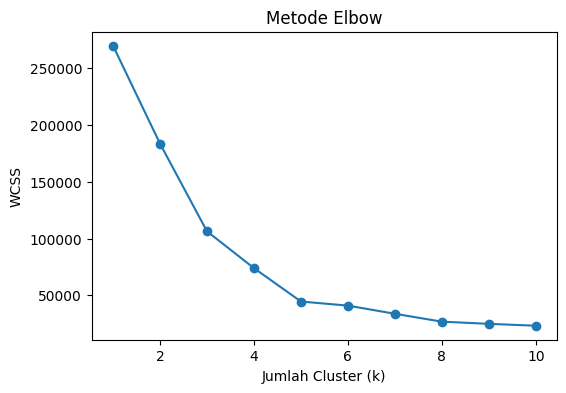

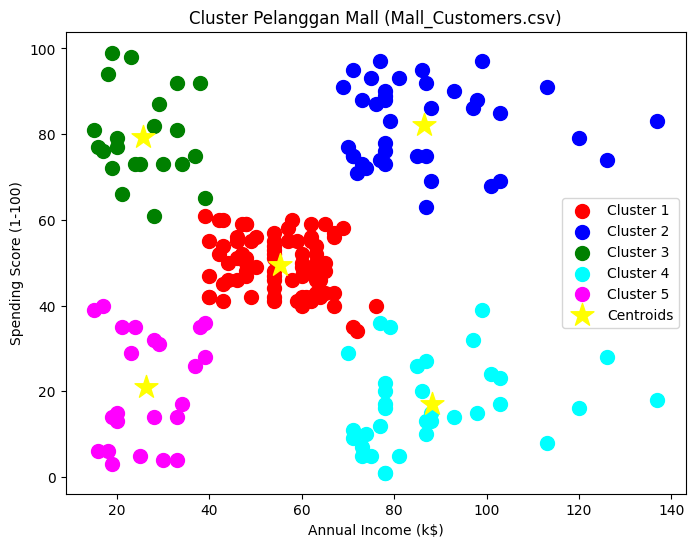

In [3]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Baca dataset
df = pd.read_csv("Mall_Customers.csv")

# 2. Pilih fitur yang relevan untuk clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 3. Menentukan jumlah cluster optimal dengan metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot grafik Elbow
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.show()

# 4. Membuat model K-Means dengan k = 5 (hasil dari metode Elbow)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# 5. Visualisasi hasil clustering
plt.figure(figsize=(8,6))
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1],
            s=100, c='red', label='Cluster 1')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1],
            s=100, c='blue', label='Cluster 2')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1],
            s=100, c='green', label='Cluster 3')
plt.scatter(X.values[y_kmeans == 3, 0], X.values[y_kmeans == 3, 1],
            s=100, c='cyan', label='Cluster 4')
plt.scatter(X.values[y_kmeans == 4, 0], X.values[y_kmeans == 4, 1],
            s=100, c='magenta', label='Cluster 5')

# Centroid cluster
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=300, c='yellow', marker='*', label='Centroids')

plt.title('Cluster Pelanggan Mall (Mall_Customers.csv)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [4]:
# Buat model KMeans dengan k=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Tambahkan hasil cluster ke dataframe
df['Cluster'] = y_kmeans
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


**2. Tugas DBSCAN**

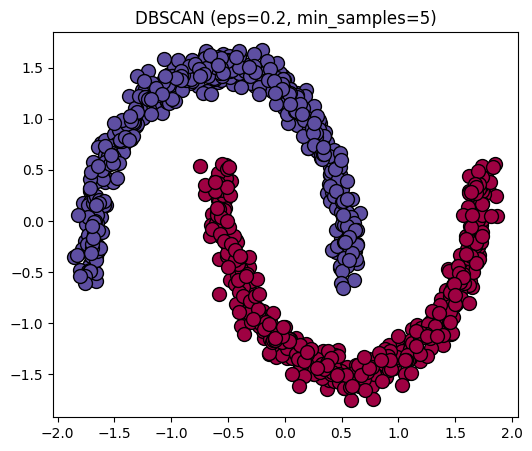

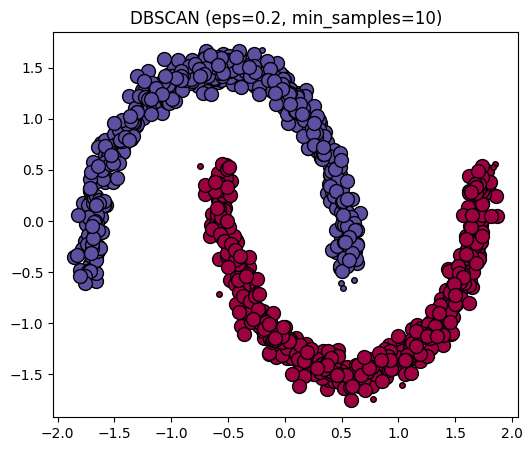

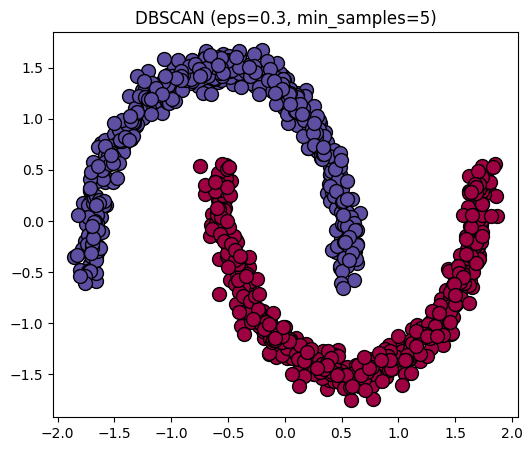

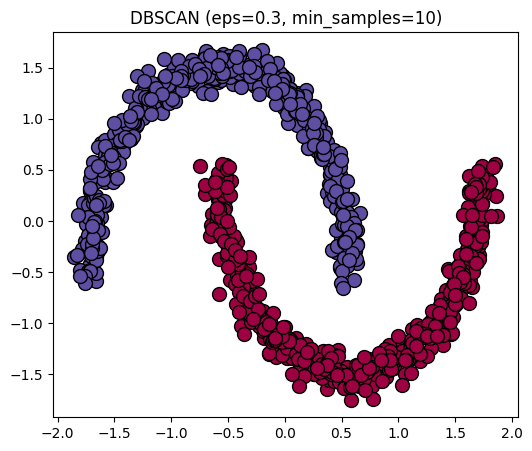

     eps  min_samples  n_clusters  n_noise  Homogeneity  Completeness  \
0   0.05            3          69      186     0.815554      0.152548   
1   0.05            5          61      386     0.615466      0.136931   
2   0.05           10           3      970     0.030669      0.126764   
3   0.05           20           0     1000          NaN           NaN   
4   0.10            3           2       14     0.986207      0.902896   
5   0.10            5           3       19     0.981343      0.632772   
6   0.10           10           7       57     0.943317      0.409546   
7   0.10           20           6      850     0.153928      0.155466   
8   0.20            3           2        0     1.000000      1.000000   
9   0.20            5           2        0     1.000000      1.000000   
10  0.20           10           2        0     1.000000      1.000000   
11  0.20           20           2        3     1.000000      0.974224   
12  0.30            3           2        0     1.00

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

# 1. Buat dataset make_moons
X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Normalisasi
X = StandardScaler().fit_transform(X)

# Fungsi untuk menjalankan DBSCAN + evaluasi
def run_dbscan(eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_

    # jumlah klaster (tidak termasuk noise = -1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    # Evaluasi (hanya jika ada >1 klaster)
    if n_clusters > 1:
        homo = homogeneity_score(y_true, labels)
        comp = completeness_score(y_true, labels)
        v_meas = v_measure_score(y_true, labels)
        ari = adjusted_rand_score(y_true, labels)
        ami = adjusted_mutual_info_score(y_true, labels)
        sil = silhouette_score(X, labels)
    else:
        homo = comp = v_meas = ari = ami = sil = np.nan

    return labels, n_clusters, n_noise, (homo, comp, v_meas, ari, ami, sil)

# Fungsi visualisasi
def plot_dbscan(X, labels, core_samples_mask, eps, min_samples):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]

    plt.figure(figsize=(6, 5))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Hitam untuk noise
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=10)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=4)

    plt.title(f"DBSCAN (eps={eps}, min_samples={min_samples})")
    plt.show()

# 2. Eksperimen parameter
eps_values = [0.05, 0.1, 0.2, 0.3, 0.5]
min_samples_values = [3, 5, 10, 20]

results = []

for eps in eps_values:
    for ms in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=ms).fit(X)
        labels = db.labels_
        core_samples_mask = np.zeros_like(labels, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True

        labels, n_clusters, n_noise, metrics = run_dbscan(eps, ms)
        results.append([eps, ms, n_clusters, n_noise, *metrics])

        # Visualisasi contoh (boleh pilih hanya sebagian biar tidak terlalu banyak plot)
        if eps in [0.2, 0.3] and ms in [5, 10]:
            plot_dbscan(X, labels, core_samples_mask, eps, ms)

# 3. Tampilkan hasil evaluasi
import pandas as pd
columns = ["eps", "min_samples", "n_clusters", "n_noise",
           "Homogeneity", "Completeness", "V-measure", "ARI", "AMI", "Silhouette"]

df_results = pd.DataFrame(results, columns=columns)
pd.set_option("display.max_rows", None)
print(df_results)
